In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.ensemble import IsolationForest
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
import joblib

In [4]:
motor0323 = pd.read_csv("03_23/VIB_0323_motor_51200.csv",sep='\t',encoding = 'cp949')

In [5]:
motor0324 = pd.read_csv("03_24/VIB_0324_motor_51200.csv",sep='\t',encoding = 'cp949')

In [10]:
def data_process(data_frame,batch_size=5110):
    before = 0
    train_data = pd.DataFrame([[]])
    for i in tqdm(range(batch_size,len(data_frame),batch_size)):
        features = pd.DataFrame(get_features(data_frame[before:i]),
                                columns = ['mean','std','min','first_quartile','median','third_quartile','max'])
        before = i
        train_data = train_data.append(features,ignore_index=True)
        
    return train_data[1:]

In [11]:
def get_features(train_data):
    describe = train_data.describe(include='all')
    mean = describe.loc['mean']
    std = describe.loc['std'] #표준편차,
    min = describe.loc['min'] 
    first_quartile= describe.loc['25%']
    median = describe.loc['50%']
    third_quartile = describe.loc['75%']
    max = describe.loc['max'] 
    
    return [[mean,std,min,first_quartile,median,third_quartile,max]]

In [35]:
m1 = data_process(motor0323.iloc[:,1])

100%|███████████████████████████████████████████████████████████████████████████| 12444/12444 [00:24<00:00, 507.99it/s]


In [36]:
pca = PCA(n_components=2)
m1 = pca.fit_transform(m1)
m1 = pd.DataFrame(data=m1, columns = ['x1', 'x2'])

In [37]:
m2 = data_process(motor0324.iloc[:,1])

100%|█████████████████████████████████████████████████████████████████████████████| 9822/9822 [00:18<00:00, 517.33it/s]


In [38]:
pca = PCA(n_components=2)
m2 = pca.fit_transform(m2)
m2 = pd.DataFrame(data=m2, columns = ['x1', 'x2'])

In [42]:
scaled_m1 = preprocessing.MaxAbsScaler().fit_transform(m1)

In [43]:
scaled_m2 = preprocessing.MaxAbsScaler().fit_transform(m2)

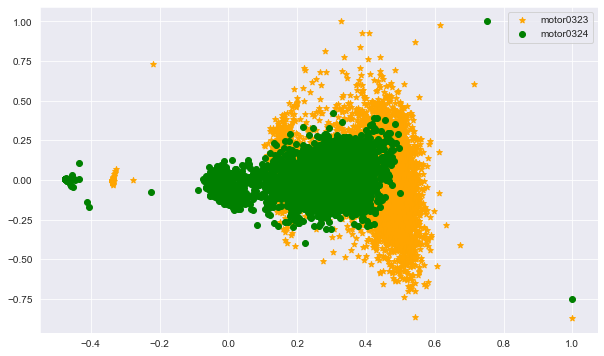

In [46]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(scaled_m1[:,0], scaled_m1[:,1], color = 'orange',marker= '*', label = 'motor0323')
plt.scatter(scaled_m2[:,0], scaled_m2[:,1], color = 'green', label = 'motor0324')
plt.legend(loc='best')

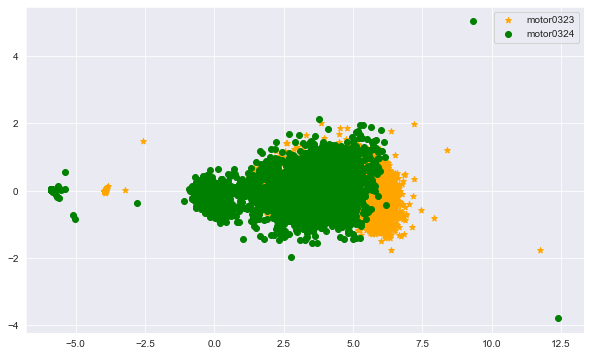

In [49]:
fig = plt.figure(figsize=(10, 6))

plt.scatter(m1['x1'], m1['x2'], color = 'orange',marker= '*', label = 'motor0323')
plt.scatter(m2['x1'], m2['x2'], color = 'green', label = 'motor0324')
plt.legend(loc='best')